# Project 1 | Unsupervised Learning 

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [1]:
#Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Nageswar\AIML\GIT\aiml-ml-hyd-apr-19-batch-nageswara-kesireddi\Projects\Unsupervised Learning-Project 1\cars-dataset.csv")

In [3]:
df.shape

(398, 8)

In [4]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [5]:
cols=df.columns
cols

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [6]:
#There are two columns 'car name' & 'hp' with  datatype as object. 
#Let's see, what non-numeric data does 'hp' has.
df['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
df['hp'].value_counts()['?']

6

In [8]:
df = df[df.hp != '?']
df.shape

(392, 8)

In [9]:
df['hp']=pd.to_numeric(df['hp'])

In [10]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp            int64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [11]:
#Now we need to convert the categorical variable "Car Name" data in to numerical data
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df[["car name"]]=enc.fit_transform(df[["car name"]])
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,car name,cyl,disp,hp,wt,acc,yr,mpg
0,48,8,307.0,130,3504,12.0,70,18.0
1,35,8,350.0,165,3693,11.5,70,15.0
2,229,8,318.0,150,3436,11.0,70,18.0
3,13,8,304.0,150,3433,12.0,70,16.0
4,159,8,302.0,140,3449,10.5,70,17.0


In [12]:
### Standardizing the dat
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df)
df_std = std_scale.transform(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [13]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,48,8,307.0,130,3504,12.0,70,18.0
1,35,8,350.0,165,3693,11.5,70,15.0
2,229,8,318.0,150,3436,11.0,70,18.0
3,13,8,304.0,150,3433,12.0,70,16.0
4,159,8,302.0,140,3449,10.5,70,17.0


In [14]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
car name,392.0,146.543367,88.626912,0.0,63.750,147.50,223.250,300.0
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E96AB4208>,
      dtype=object)

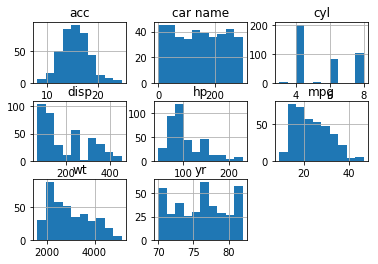

In [15]:
df.hist()

Observation: from the above histograms we can infer
    1. Accelaraiton is normally distributed, with most of the values between 10 and 20
    2. cylenders: Right skewed, with  200 cars having 4 cyclenders. 
    3. Displacement is Right skewed 
    4. Horsepower: Right skewed, with median value of 90 approximately.
    5. mpg:Right skewed, with median value 10
    6. weight: Right

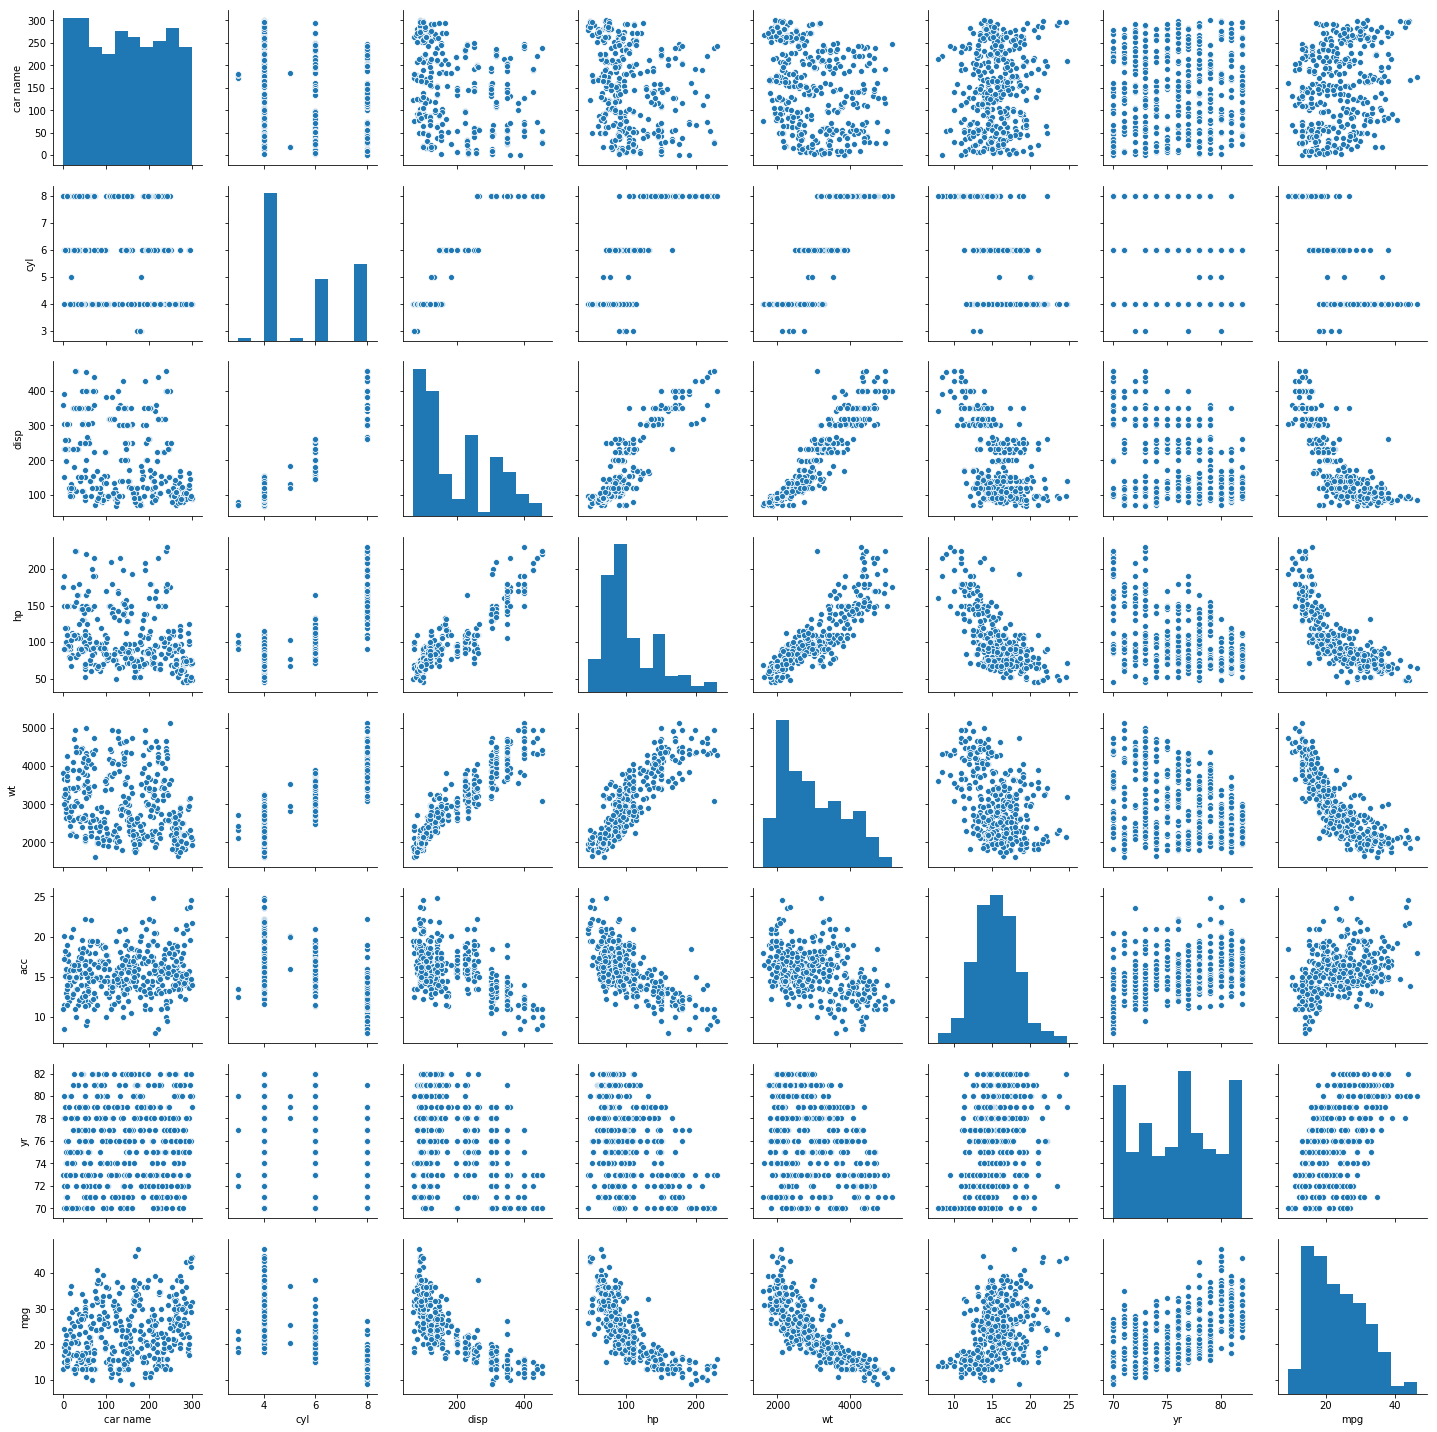

In [16]:
sns.pairplot(df)

Inference: mpg is dropping as the disp, weight or horsepower increase


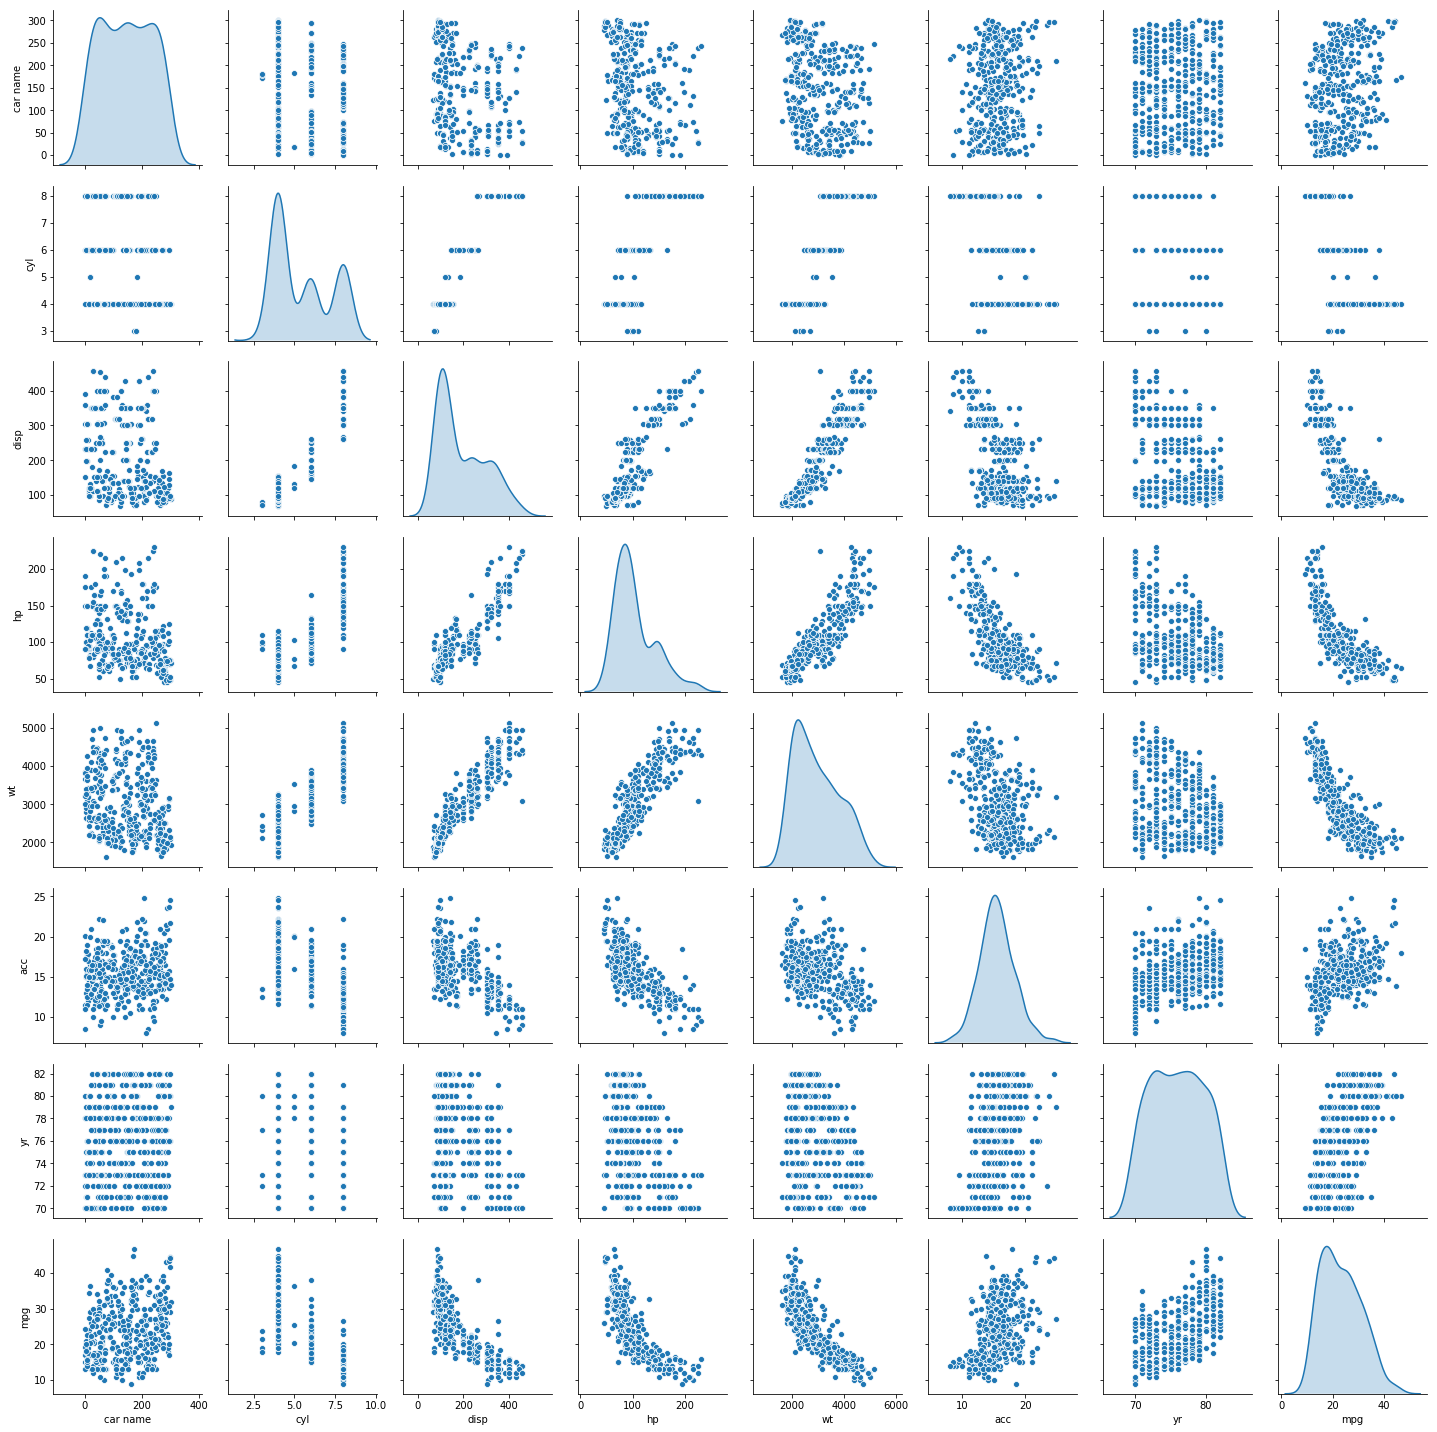

In [17]:
sns.pairplot(df,diag_kind='kde')

Inference:  From the above graph, no of cyclenders seems to have three clusters.  
    This can be taken as a refernce to start with

## Hierarchical clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering 

In [19]:
from sklearn.preprocessing import StandardScaler
colnames=df.columns
scaler=StandardScaler()
scaler.fit(df)
df=scaler.transform(df)
df=pd.DataFrame(df)
df.columns=colnames

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [20]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [21]:
model.fit(df)
pd.unique(model.labels_)

array([1, 0, 2], dtype=int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E9F591C50>,
      dtype=object)

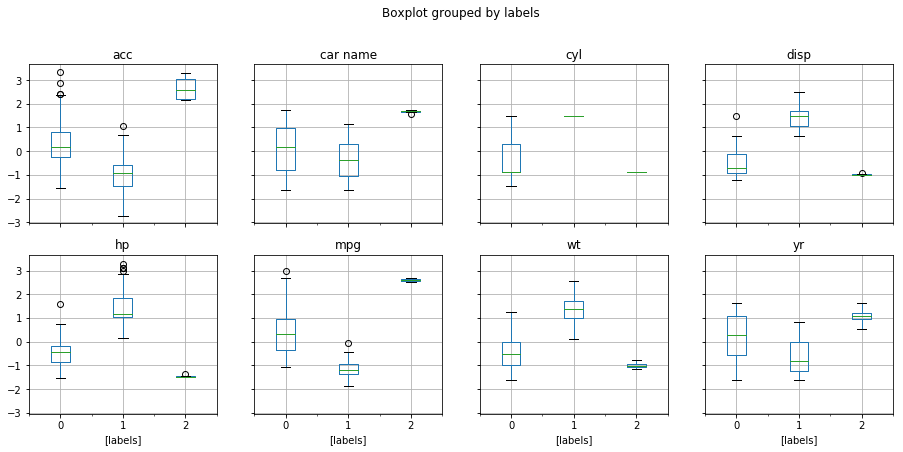

In [22]:
df['labels'] = model.labels_
df.groupby(["labels"]).count()
df.boxplot(by = 'labels',  layout=(3,4), figsize=(15, 10))

In [23]:
df.shape

(392, 9)

In [24]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage


In [25]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [26]:
Z = linkage(df, 'average')
c, coph_dists = cophenet(Z , pdist(df))
c, coph_dists

(0.7849373109554497,
 array([0.93029916, 2.68825991, 0.70759381, ..., 2.42274121, 2.42274121,
        1.74135514]))

In [27]:
distDf = pd.DataFrame(list(coph_dists), columns=['clusterDist'])
distDf['ecludianDist'] = pdist(df)
distDf.corr()

,clusterDist,ecludianDist
clusterDist,1.000000,0.784937
ecludianDist,0.784937,1.000000


In [28]:
distDf.shape, df.shape

((76636, 2), (392, 9))

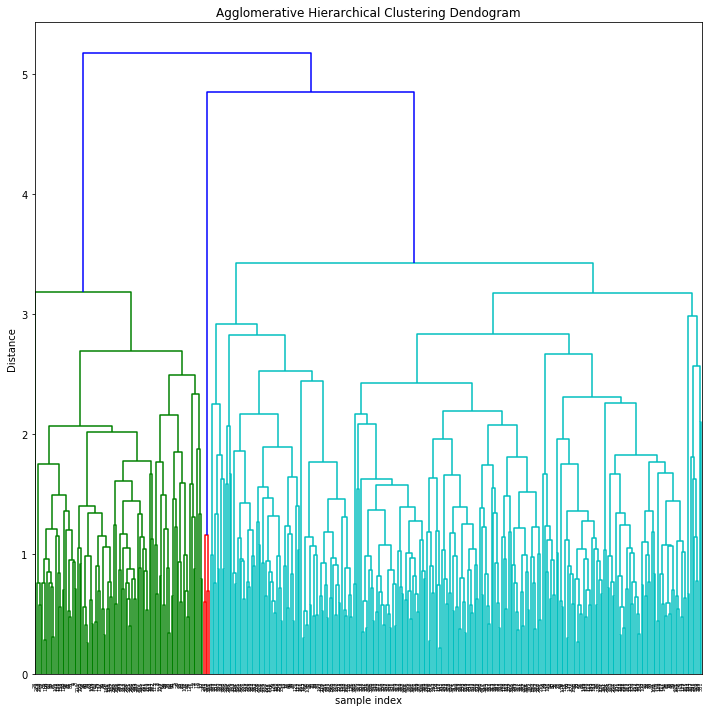

In [29]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

In [30]:
Z = linkage(df, 'complete')
c, coph_dists = cophenet(Z , pdist(df))
print(c)

0.7575980223564038


In [31]:
distDf = pd.DataFrame(list(coph_dists), columns=['clusterDist'])
distDf['ecludianDist'] = pdist(df)
distDf.shape,df.shape


((76636, 2), (392, 9))

In [32]:
distDf.corr()

,clusterDist,ecludianDist
clusterDist,1.000000,0.757598
ecludianDist,0.757598,1.000000


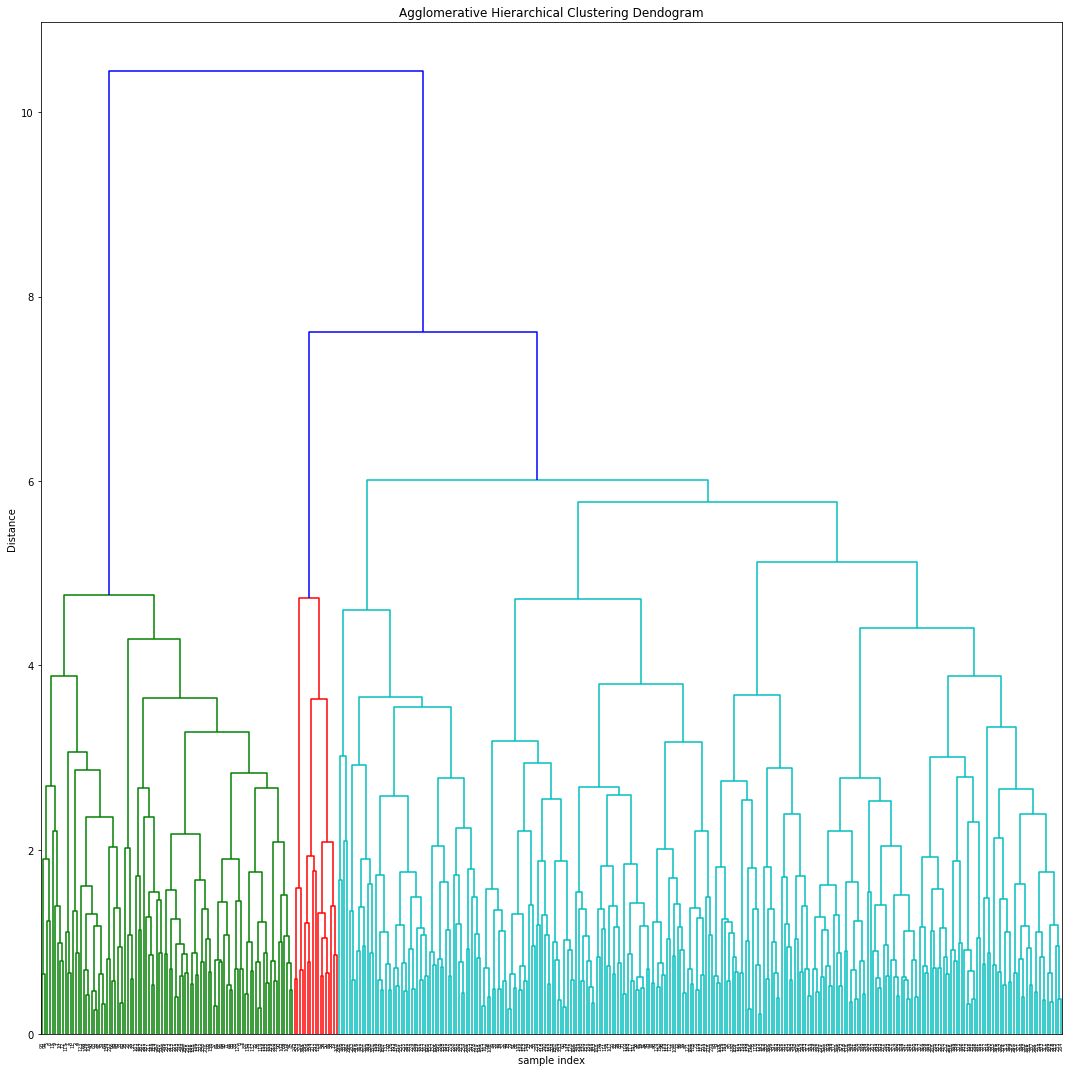

In [33]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

# Kmeans clustering

In [34]:
df = df[df.hp != '?']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [35]:
df['hp']=pd.to_numeric(df['hp'])

In [36]:
df.mpg.describe()

count    3.920000e+02
mean    -1.840931e-16
std      1.001278e+00
min     -1.853218e+00
25%     -8.269250e-01
50%     -8.927701e-02
75%      7.125143e-01
max      2.970359e+00
Name: mpg, dtype: float64

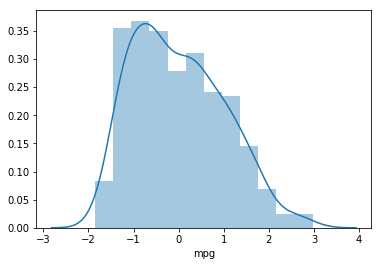

In [37]:
sns.distplot(df['mpg'])

In [38]:
print("Skewness: %f" % df['mpg'].skew())
print("Kurtosis: %f" % df['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [39]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [40]:
df_scale = df.copy()

In [41]:
df_scale ['disp'] = scale(df_scale['disp'])
df_scale['hp'] = scale(df_scale['hp'])
df_scale ['acc'] = scale(df_scale['acc'])
df_scale ['wt'] = scale(df_scale['wt'])
df_scale['mpg'] = scale(df_scale['mpg'])

In [42]:
df_scale.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels
0,-1.113311,1.483947,0.617571,0.456522,0.536150,0.238095,-1.625315,0.239362,1
1,-1.260181,1.483947,0.728682,0.646739,0.589736,0.208333,-1.625315,0.159574,1
2,0.931568,1.483947,0.645995,0.565217,0.516870,0.178571,-1.625315,0.239362,1
3,-1.508729,1.483947,0.609819,0.565217,0.516019,0.238095,-1.625315,0.186170,1
4,0.140731,1.483947,0.604651,0.510870,0.520556,0.148810,-1.625315,0.212766,1


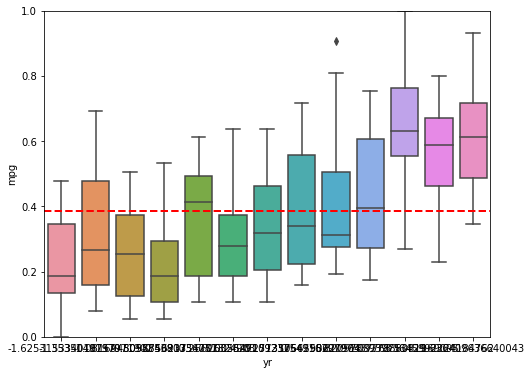

In [43]:
var = 'yr'
data_plt = pd.concat([df_scale['mpg'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

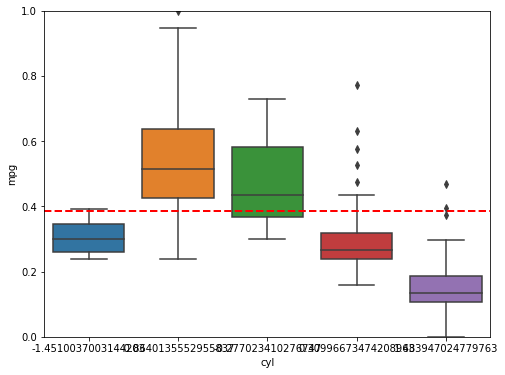

In [44]:
var = 'cyl'
data_plt = pd.concat([df_scale['mpg'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [45]:
df.corr()

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels
car name,1.000000,-0.275424,-0.289067,-0.233369,-0.249398,0.134302,0.075379,0.265624,-0.114348
cyl,-0.275424,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618,0.763403
disp,-0.289067,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127,0.748095
hp,-0.233369,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427,0.723961
wt,-0.249398,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244,0.692381
acc,0.134302,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329,-0.437807
yr,0.075379,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541,-0.285785
mpg,0.265624,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000,-0.493394
labels,-0.114348,0.763403,0.748095,0.723961,0.692381,-0.437807,-0.285785,-0.493394,1.000000


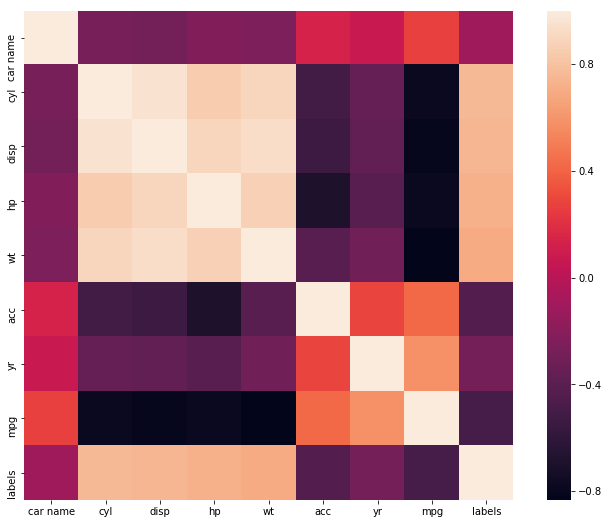

In [46]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

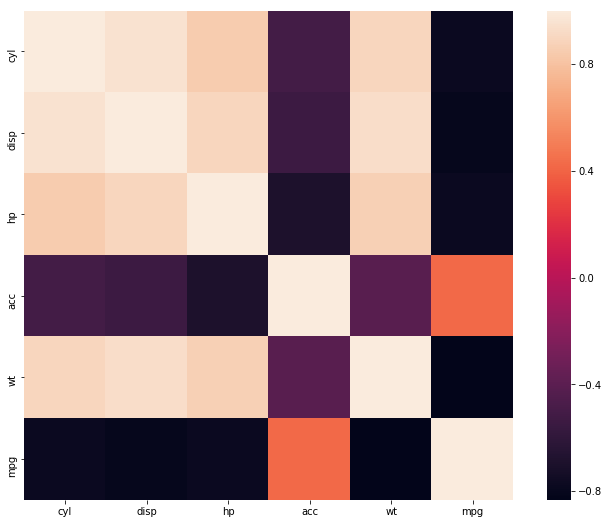

In [47]:
factors = ['cyl','disp','hp','acc','wt','mpg']
corrmat = df[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [48]:
var='mpg'
df[df[var]== df[var].min()]

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels
28,0.163326,1.483947,1.048584,2.302964,2.06811,1.073795,-1.625315,-1.853218,1


In [49]:
df[df[var]== df[var].max()]

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels
320,0.310196,-0.864014,-1.037332,-1.026725,-1.022711,0.856036,1.092789,2.970359,0


In [50]:
var='disp'
df[df[var]== df[var].min()]

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels
116,-0.265985,-0.864014,-1.209563,-1.442936,-1.30916,1.436726,-0.809884,0.712514,0


In [51]:
df[df[var]== df[var].max()]

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels
8,1.044545,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,-1.211785,1
13,-1.327967,1.483947,2.493416,3.135386,0.127801,-2.011120,-1.625315,-1.211785,1
94,-1.339264,1.483947,2.493416,3.135386,2.326268,-1.648189,-0.809884,-1.468358,1


In [52]:
var='hp'
df[df[var]== df[var].min()]

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels
19,1.485154,-0.864014,-0.932079,-1.520975,-1.346881,1.799657,-1.625315,0.327654,0
101,1.598131,-0.864014,-0.932079,-1.520975,-1.211319,1.981123,-0.809884,0.327654,0


In [53]:
df[df[var]== df[var].max()]

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels
115,1.078438,1.483947,1.967153,3.265452,1.532934,-2.192586,-0.809884,-0.955212,1


In [54]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 
Z=linkage(df,'average')
c,coph_dists=cophenet(Z,pdist(df))
print(c)

0.7849373109554497


In [55]:
df.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'labels'], dtype='object')

In [56]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)


km.fit(df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']])
df["clusterLabels"]=km.predict(df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']])
df.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels,clusterLabels
0,-1.113311,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,1,1
1,-1.260181,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,1,1
2,0.931568,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,1,1
3,-1.508729,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,1,1
4,0.140731,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,1,1


In [57]:
df["clusterLabels"].unique()

array([1, 0], dtype=int64)

In [58]:
distortion = []

In [59]:
from scipy.spatial.distance import cdist
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortion.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

In [60]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels,clusterLabels
0,-1.113311,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,1,1
1,-1.260181,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,1,1
2,0.931568,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,1,1
3,-1.508729,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,1,1
4,0.140731,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,1,1


In [61]:
distortion

[2.748177380071723,
 1.9667846416709098,
 1.7401861720805945,
 1.5850917229192967,
 1.510636140066411,
 1.4450588967845075,
 1.3836670525194523,
 1.3231626475178704,
 1.2956959544697277]

In [62]:
km.cluster_centers_

array([[-0.52654535, -0.51598601, -0.509452  , -0.48137723,  0.35501413,
         0.22242724,  0.40337487],
       [ 1.43922397,  1.41036176,  1.39250213,  1.31576444, -0.97037195,
        -0.60796778, -1.10255797]])

In [63]:
km.inertia_

1272.9007603914606

In [64]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(1,10):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']])
    
    #Add cluster information for each record in dataframe
    df['k_' + str(i)] = km.predict(df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']])
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

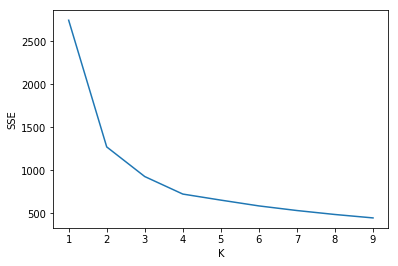

In [65]:
sns.lineplot(x='K', y='SSE', data=sse_df)

In [66]:
## From the above graph, the optimal value of K can be taken as 3

In [67]:
sse_df

,K,SSE
0,1.0,2744.000000
1,2.0,1272.900760
2,3.0,928.617487
3,4.0,725.327184
4,5.0,654.967974
5,6.0,587.798679
6,7.0,534.109731
7,8.0,488.045819
8,9.0,448.314897


In [68]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels,clusterLabels,k_1,k_2,k_3,k_4,k_5,k_6,k_7,k_8,k_9
0,-1.113311,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,1,1,0,0,1,0,4,5,4,1,2
1,-1.260181,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,1,1,0,0,1,0,4,5,2,1,4
2,0.931568,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,1,1,0,0,1,0,4,5,2,1,4
3,-1.508729,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,1,1,0,0,1,0,4,5,2,1,2
4,0.140731,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,1,1,0,0,1,0,4,5,2,1,2


In [69]:
df.groupby('k_3').agg({'cyl':'median', 'disp':'median', 'hp':'median', 'wt':'median', 'acc':'median', 'yr':'median', 'mpg':'median' })

,cyl,disp,hp,wt,acc,yr,mpg
k_3,,,,,,,
0,-0.864014,-0.855532,-0.714566,-0.878897,0.239053,0.549168,0.712514
1,1.483947,1.488732,1.184397,1.429199,-0.994913,-0.809884,-1.211785
2,0.309967,0.350090,-0.116263,0.315230,0.166467,0.005547,-0.570352


In [70]:
from sklearn.preprocessing import StandardScaler
data = df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']]
scaler =StandardScaler()
scaler.fit(data)
data=scaler.transform(data)
data=pd.DataFrame(data)
data.columns=df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']].columns


In [71]:
data.index=df.index

In [72]:
km=KMeans(n_clusters=3)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
km.cluster_centers_

array([[ 0.3470398 ,  0.2384915 , -0.04424757,  0.30335558,  0.29291981,
         0.01126948, -0.4725839 ],
       [ 1.48394702,  1.48591152,  1.49929313,  1.38738246, -1.06597113,
        -0.66682598, -1.15155766],
       [-0.86110766, -0.81098162, -0.6843036 , -0.79514908,  0.36356374,
         0.30830628,  0.76382895]])

In [74]:
centroid=pd.DataFrame(km.cluster_centers_)
centroid

,0,1,2,3,4,5,6
0,0.347040,0.238491,-0.044248,0.303356,0.292920,0.011269,-0.472584
1,1.483947,1.485912,1.499293,1.387382,-1.065971,-0.666826,-1.151558
2,-0.861108,-0.810982,-0.684304,-0.795149,0.363564,0.308306,0.763829


In [75]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,

In [76]:
km.labels_.shape

(392,)

In [77]:
df["clusters"]=km.labels_

In [78]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,labels,clusterLabels,k_1,k_2,k_3,k_4,k_5,k_6,k_7,k_8,k_9,clusters
0,-1.113311,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,1,1,0,0,1,0,4,5,4,1,2,1
1,-1.260181,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,1,1,0,0,1,0,4,5,2,1,4,1
2,0.931568,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,1,1,0,0,1,0,4,5,2,1,4,1
3,-1.508729,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,1,1,0,0,1,0,4,5,2,1,2,1
4,0.140731,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,1,1,0,0,1,0,4,5,2,1,2,1


# Linear Regression Model for three clusters

In [79]:
# Data Sets for Cluster 0, Cluster 1, Cluster 2
data_Cluster_0 =df[df['clusters']==0]
data_Cluster_1 =df[df['clusters']==1]
data_Cluster_2 =df[df['clusters']==2]

data_Cluster_0.shape,data_Cluster_1.shape,data_Cluster_2.shape

((95, 20), (95, 20), (202, 20))

# Linear Regression model for Cluster 0

In [80]:
Y_Cluster_0=data_Cluster_0[["mpg"]]
X_Cluster_0=data_Cluster_0[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']]

In [81]:
from sklearn import model_selection
validation_size = 0.20
seed = 7

In [82]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_Cluster_0, Y_Cluster_0, test_size=validation_size, random_state=seed)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
regression_model.coef_

array([[ 0.24273321, -0.09909794, -0.18020038, -0.42100404, -0.09512848,
         0.26113954]])

In [85]:
rmse = mean_squared_error(Y_validation, regression_model.predict(X_validation))
r2 = r2_score(Y_validation, regression_model.predict(X_validation))
print(rmse)
print(r2)

0.0541571219831383
-0.4719541901021693


# Linear Regression model for Cluster 1

In [86]:
Y_Cluster_1=data_Cluster_1[["mpg"]]
X_Cluster_1=data_Cluster_1[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_Cluster_1, Y_Cluster_1, test_size=validation_size, random_state=seed)

In [87]:
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
regression_model.coef_

array([[ 0.        , -0.14824208, -0.10760676, -0.06081614, -0.25646019,
         0.18704537]])

In [89]:
rmse = mean_squared_error(Y_validation, regression_model.predict(X_validation))
r2 = r2_score(Y_validation, regression_model.predict(X_validation))
print(rmse)
print(r2)

0.03158249644871032
0.2910051287910652


# Linear Regression for cluster 2 

In [90]:
Y_Cluster_2=data_Cluster_2[["mpg"]]
X_Cluster_2=data_Cluster_2[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_Cluster_2, Y_Cluster_2, test_size=validation_size, random_state=seed)

In [91]:
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
regression_model.coef_

array([[ 1.2727075 , -0.53100292, -0.33390289, -0.61120652, -0.04957905,
         0.41411111]])